<br>

# 过拟合问题 (Overfitting) 

<br>

## 0. 概述

<br>

<font color=black size=3 face=雅黑>　　过拟合的定义 (Tom Mitchell)：“给定一个假设空间 $H$，一个假设 $h$ 属于 $H$，如果存在其他的假设 $h'$ 属于 $H$，使得在训练样例上 $h$ 的错误率比 $h'$ 小，但在整个实例分布上 $h'$ 比 $h$ 的错误率小，那么就说假设 $h$ 过度拟合训练数据。”
    
<font color=black size=3 face=雅黑>　　过拟合的具体表现就是最终模型在训练集上效果很好，但是在测试集上效果较差，即模型泛化能力较弱。下图三所示就是一个典型的过拟合的分类模型。可以想见，如果将该模型应用在新的样本上，则测试结果将不如图二中的模型。
    
<code>
%%html
<img src ="https://gimg2.baidu.com/image_search/src=http%3A%2F%2Fassets.leetcode-cn.com%2Faliyun-lc-upload%2Fuploads%2F2019%2F01%2F30%2Funderfitting.png&refer=http%3A%2F%2Fassets.leetcode-cn.com&app=2002&size=f9999,10000&q=a80&n=0&g=0n&fmt=jpeg?sec=1638682859&t=222efe0fd7330d099caecd75a02fb104", width=80%>

<font color=black size=3 face=雅黑>　　导致过拟合出现的原因主要是学习过度和样本特征不均衡，例如模型训练数据过少，训练集和测试集分布不一致，训练样本中的噪声数据干扰过大，导致模型学习了噪声，反而忽略了真实的输入输出特征等。
 

<font color=black size=3 face=雅黑>　　为了帮大家更好的理解这个问题，下面我们就来模拟一个过拟合的训练模型，并采用几种不同的方法来解决它，观察不同方法产生的效果。
    
<br>


## 1. 导入 PyTorch及其他库

<br>

In [1]:
import torch
import torch.nn as nn
import torchvision
import numpy as np
import matplotlib.pyplot as plt

<font color=black size=3 face=雅黑>查看 PyTorch 版本，是否可以使用GPU，以及 CUDA 的版本。

In [2]:
torch.manual_seed(0)
print(torch.__version__)
print(torchvision.__version__)
print(torch.cuda.is_available())
print(torch.version.cuda)

1.5.0
0.6.0
True
10.2


## 2. 观察过拟合现象
<br>

### 2.1 生成样本集

<br>

<font color=black size=3 face=雅黑>　　下面我们来生成训练和测试样本集，其中每个样本集包含20个样本点。

<br>

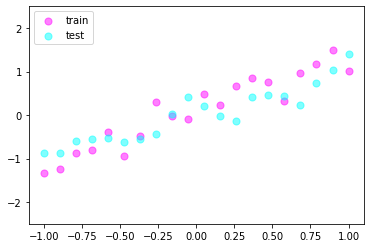

In [3]:
N_SAMPLES = 20  # 样本点个数

# 生成训练集
x = torch.unsqueeze(torch.linspace(-1, 1, N_SAMPLES),1)
y = x + 0.3*torch.normal(torch.zeros(N_SAMPLES,1), torch.ones(N_SAMPLES,1))  # torch.normal(means,std): 返回一个张量，包含从给定参数means,std的离散正态分布中抽取随机数

# 生成测试集
test_x = torch.unsqueeze(torch.linspace(-1, 1, N_SAMPLES),1)
test_y = test_x + 0.3*torch.normal(torch.zeros(N_SAMPLES,1), torch.ones(N_SAMPLES,1))

# 绘图
plt.scatter(x.data.numpy(), y.data.numpy(), c='magenta', s=50, alpha=0.5, label='train')
plt.scatter(test_x.data.numpy(), test_y.data.numpy(), c='cyan', s=50, alpha=0.5, label='test')
plt.legend(loc='upper left')
plt.ylim((-2.5, 2.5))
plt.show()

### 2.2 构建神经网络

<br>

<font color=black size=3 face=雅黑>　　定义一个简单的全连接神经网络，其中包含三个隐含层，权重矩阵大小（$n^{[l]}*n^{[l-1]}$）分别为 300\*1，300\*300，1\*300。

<br>

In [5]:
N_HIDDEN1 = 300

class Network1(nn.Module):
    def __init__(self):
        super(Network1, self).__init__()
        self.layer1 = nn.Linear(1, 300)
        self.layer2 = nn.Linear(300, 300)
        self.layer3 = nn.Linear(300, 1)
       
    def forward(self, t):
        t = self.layer1(t)
        t = nn.functional.relu(t)
        t = self.layer2(t)
        t = nn.functional.relu(t)
        t = self.layer3(t)
        
        return t

In [6]:
network1 = Network1()
print(network1)

Network1(
  (layer1): Linear(in_features=1, out_features=300, bias=True)
  (layer2): Linear(in_features=300, out_features=300, bias=True)
  (layer3): Linear(in_features=300, out_features=1, bias=True)
)


### 2.3 训练与测试

<br>

<font color=black size=3 face=雅黑>　　在生成的样本集上训练并测试定义好的网络。

<br>

epoch[ 0 ]:  test loss  tensor(1.3886, grad_fn=<MseLossBackward>)


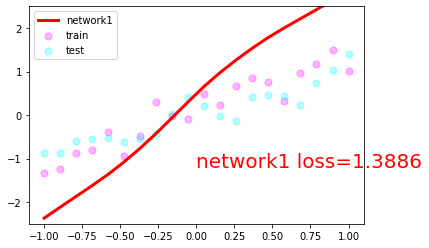

epoch[ 20 ]:  test loss  tensor(0.1969, grad_fn=<MseLossBackward>)


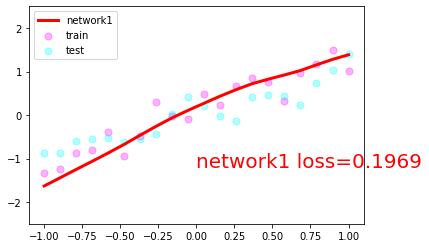

epoch[ 40 ]:  test loss  tensor(0.1228, grad_fn=<MseLossBackward>)


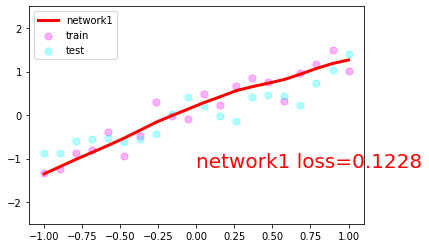

epoch[ 60 ]:  test loss  tensor(0.1157, grad_fn=<MseLossBackward>)


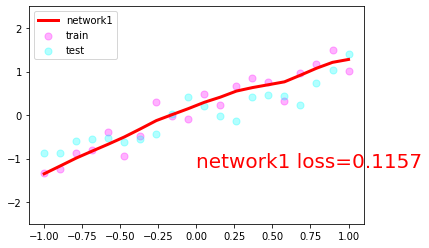

epoch[ 80 ]:  test loss  tensor(0.1138, grad_fn=<MseLossBackward>)


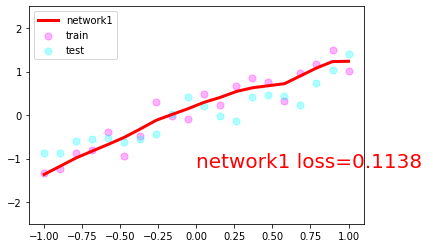

epoch[ 100 ]:  test loss  tensor(0.1159, grad_fn=<MseLossBackward>)


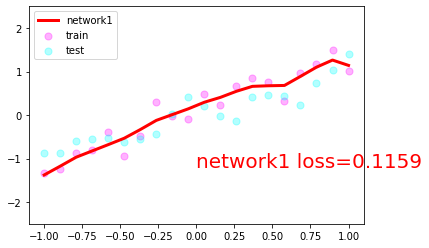

epoch[ 120 ]:  test loss  tensor(0.1117, grad_fn=<MseLossBackward>)


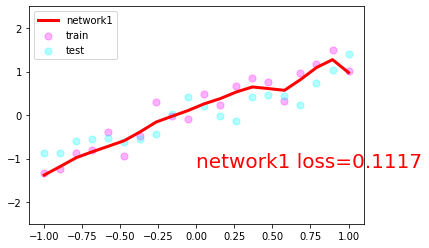

epoch[ 140 ]:  test loss  tensor(0.1285, grad_fn=<MseLossBackward>)


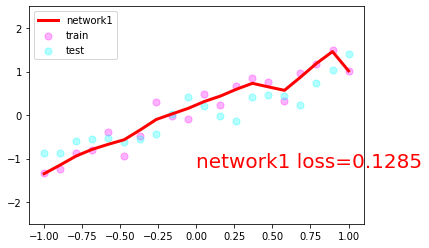

epoch[ 160 ]:  test loss  tensor(0.1247, grad_fn=<MseLossBackward>)


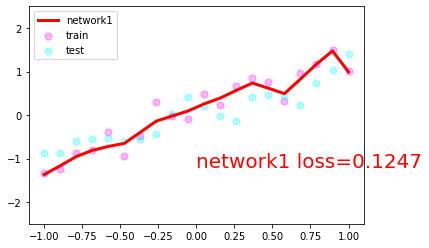

epoch[ 180 ]:  test loss  tensor(0.1377, grad_fn=<MseLossBackward>)


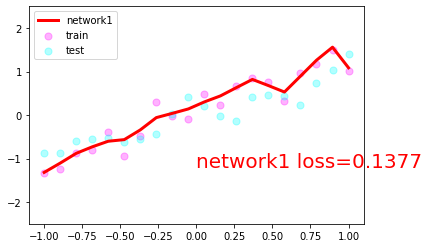

epoch[ 200 ]:  test loss  tensor(0.1319, grad_fn=<MseLossBackward>)


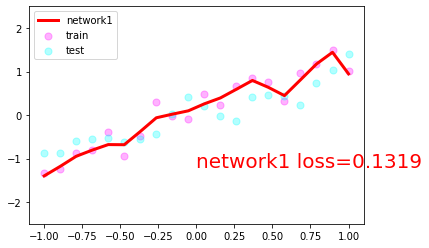

epoch[ 220 ]:  test loss  tensor(0.2320, grad_fn=<MseLossBackward>)


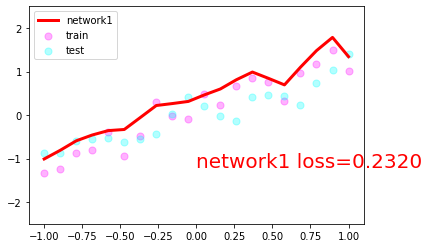

epoch[ 240 ]:  test loss  tensor(0.1421, grad_fn=<MseLossBackward>)


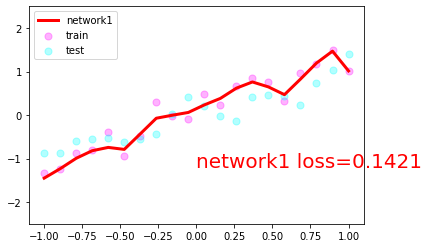

epoch[ 260 ]:  test loss  tensor(0.1366, grad_fn=<MseLossBackward>)


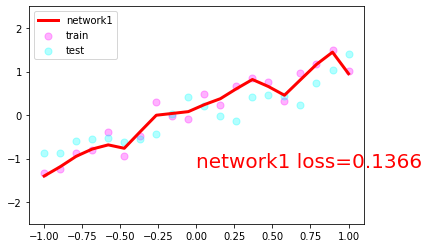

epoch[ 280 ]:  test loss  tensor(0.1408, grad_fn=<MseLossBackward>)


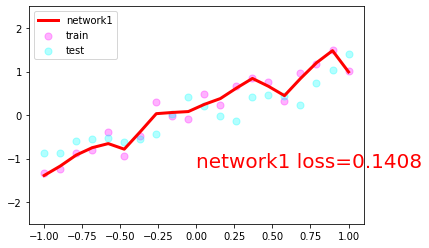

epoch[ 300 ]:  test loss  tensor(0.1434, grad_fn=<MseLossBackward>)


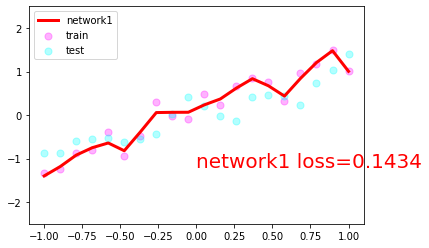

epoch[ 320 ]:  test loss  tensor(0.1570, grad_fn=<MseLossBackward>)


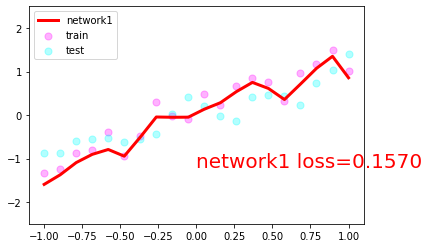

epoch[ 340 ]:  test loss  tensor(0.1432, grad_fn=<MseLossBackward>)


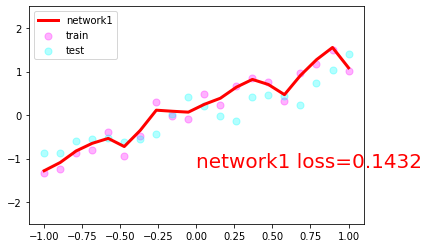

epoch[ 360 ]:  test loss  tensor(0.1559, grad_fn=<MseLossBackward>)


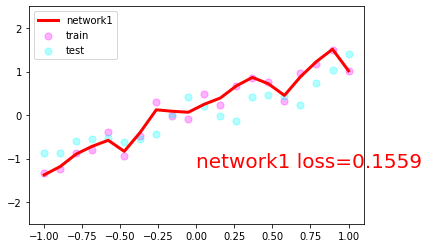

epoch[ 380 ]:  test loss  tensor(0.1774, grad_fn=<MseLossBackward>)


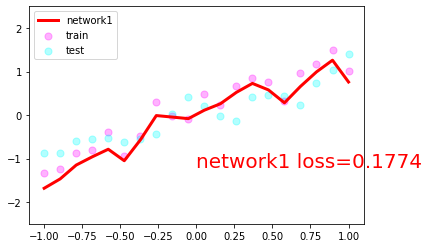

epoch[ 400 ]:  test loss  tensor(0.1502, grad_fn=<MseLossBackward>)


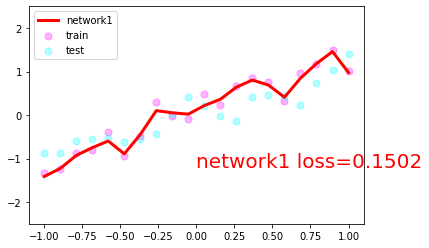

epoch[ 420 ]:  test loss  tensor(0.1492, grad_fn=<MseLossBackward>)


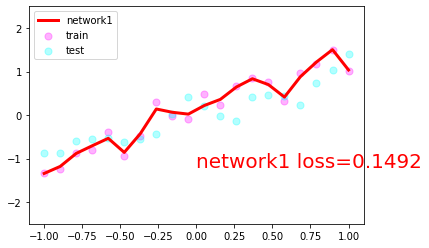

epoch[ 440 ]:  test loss  tensor(0.1568, grad_fn=<MseLossBackward>)


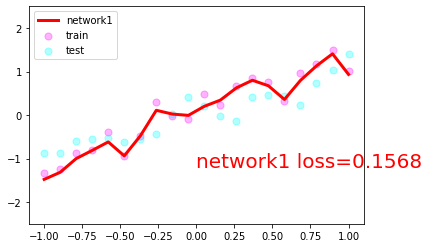

epoch[ 460 ]:  test loss  tensor(0.1575, grad_fn=<MseLossBackward>)


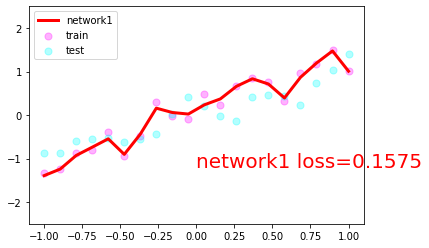

epoch[ 480 ]:  test loss  tensor(0.1595, grad_fn=<MseLossBackward>)


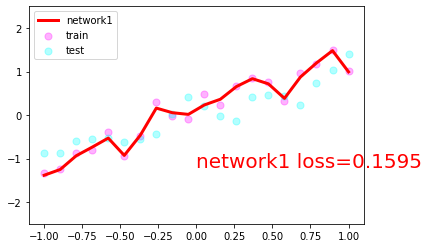

In [7]:
optimizer1 = torch.optim.Adam(network1.parameters(),lr=0.01)  # 优化器: Adam  # 可以有decay
loss_func = torch.nn.MSELoss()  # 损失函数：均方差函数
test_loss1 = []

plt.ion()  # 

for t in range(500):
    pred1 = network1(x)  # 正向传播
    loss1 = loss_func(pred1, y)  # 计算损失
    
    optimizer1.zero_grad()
    loss1.backward()  # 反向传播
    optimizer1.step()  # 更新参数
    
    network1.eval()
    test_pred1 = network1(test_x)  # 在测试集上测试
    test_loss1.append(loss_func(test_pred1, test_y))  # 记录损失

    if t%20 == 0:  # 绘图
        print("epoch[", t, "]:  test loss ", test_loss1[-1])
        plt.cla()       
        plt.scatter(x.data.numpy(), y.data.numpy(), c='magenta', s=50, alpha=0.3, label='train')
        plt.scatter(test_x.data.numpy(), test_y.data.numpy(), c='cyan', s=50, alpha=0.3, label='test')
        
        plt.plot(test_x.data.numpy(), test_pred1.data.numpy(), 'r-', lw=3, label='network1')
        plt.text(0, -1.2, 'network1 loss=%.4f'%loss_func(test_pred1, test_y).data.numpy(), fontdict={'size':20, 'color':'red'})
        plt.legend(loc='upper left')
        plt.ylim((-2.5, 2.5))
        plt.pause(0.1)
        
    network1.train()

plt.ioff()
plt.show()

<br>

<font color=black size=3 face=雅黑>把 test_loss1 打印出来看看：

<br>

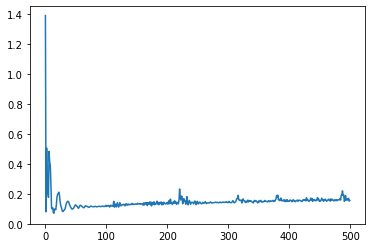

In [8]:
plot_loss_x = np.arange(0,500)
plt.ylim((0, 1.45))
plt.plot(plot_loss_x, np.array(test_loss1))

<br>

<font color=black size=3 face=雅黑>　　变换 y 轴的范围放大来看，可以看到在第 50 到 500 个训练周期上，测试集上的损失整体趋势是上升的，这说明模型在训练过程中逐渐变得过拟合。
    
<br>

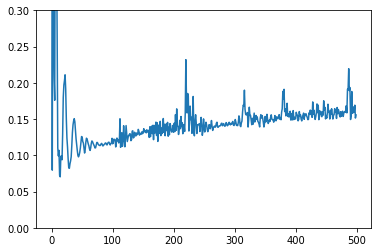

In [9]:
plt.ylim((0, 0.3))  # 调整的地方
plt.plot(plot_loss_x, np.array(test_loss1))

<br>

## 3. 解决过拟合 - 方案一 ：添加 Dropout 层

<br>

<font color=black size=3 face=雅黑>　　随着深度学习模型层数的增加，Dropout 作为一个防止过拟合的有效手段，使用也越来越普遍。Dropout 改变了之前稠密网络中参数统一学习、统一更新的模式，提出在每次训练迭代中，仅让网络中的部分参数得到学习和更新，剩下的参数保持不更新。
    
    
<font color=black size=3 face=雅黑>　　PyTorch 为我们提供了 Dropout 层，我们仅需使用 nn.Dropout 即可。

    
<code>
%%html
<img src = "https://gimg2.baidu.com/image_search/src=http%3A%2F%2Finews.gtimg.com%2Fnewsapp_match%2F0%2F10606438161%2F0.jpg&refer=http%3A%2F%2Finews.gtimg.com&app=2002&size=f9999,10000&q=a80&n=0&g=0n&fmt=jpeg?sec=1638686236&t=26a76febd85f9cc4353b3c9ce0b08366", width=60%>
    
<br>

### 3.1 构建神经网络，添加 Dropout 层

<br>

<font color=black size=3 face=雅黑>　　新的神经网络结构与 Network1 基本类似，只是在最后一个全连接层之前加入了一个 Dropout 层。
    
<font color=black size=3 face=雅黑>　　**请同学们先阅读、运行下面的代码，然后将“nn.Dropout(0.8)”修改为“nn.Dropout(0.2)”，在实验报告中比较二者结果，讨论有什么不同。**

<br>

In [15]:
N_HIDDEN2 = 300

class Network2(nn.Module):
    def __init__(self):
        super(Network2, self).__init__()
        self.layer1 = nn.Linear(1, 300)
        self.layer2 = nn.Linear(300, 300)
        self.layer3 = nn.Dropout(0.2)  # Dropout层：这里的 0.8 是指该层的神经元在每次迭代训练时会随机有 80% 的可能性被丢弃
        self.layer4 = nn.Linear(300, 1)
       
    def forward(self, t):
        t = self.layer1(t)
        t = nn.functional.relu(t)
        t = self.layer2(t)
        t = nn.functional.relu(t)
        t = self.layer3(t)
        t = self.layer4(t)
        
        return t

In [16]:
network2 = Network2()
print(network2)

Network2(
  (layer1): Linear(in_features=1, out_features=300, bias=True)
  (layer2): Linear(in_features=300, out_features=300, bias=True)
  (layer3): Dropout(p=0.2, inplace=False)
  (layer4): Linear(in_features=300, out_features=1, bias=True)
)


### 3.2 训练并测试

<br>

epoch[ 0 ]:  test loss  tensor(1.2858, grad_fn=<MseLossBackward>)


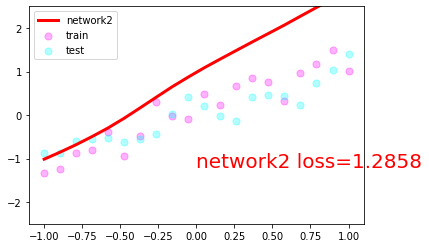

epoch[ 20 ]:  test loss  tensor(0.0979, grad_fn=<MseLossBackward>)


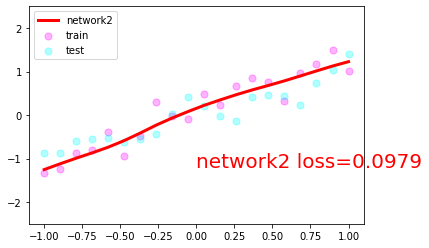

epoch[ 40 ]:  test loss  tensor(0.1085, grad_fn=<MseLossBackward>)


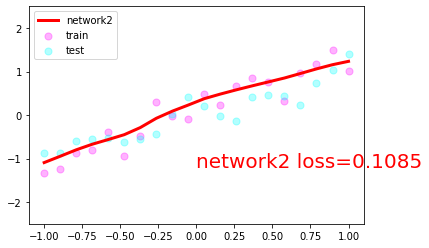

epoch[ 60 ]:  test loss  tensor(0.1151, grad_fn=<MseLossBackward>)


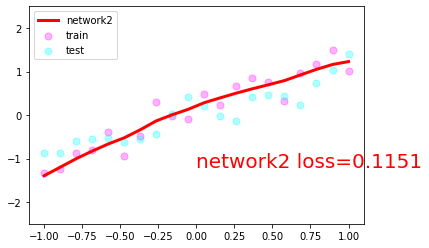

epoch[ 80 ]:  test loss  tensor(0.1201, grad_fn=<MseLossBackward>)


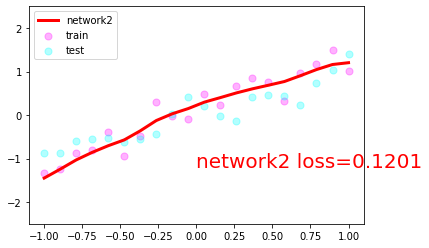

epoch[ 100 ]:  test loss  tensor(0.1084, grad_fn=<MseLossBackward>)


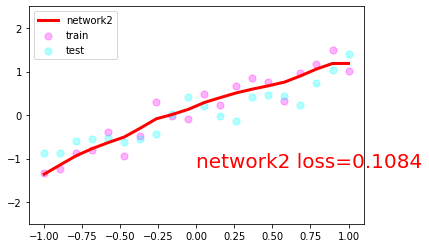

epoch[ 120 ]:  test loss  tensor(0.1187, grad_fn=<MseLossBackward>)


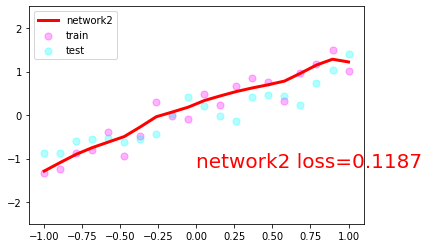

epoch[ 140 ]:  test loss  tensor(0.1153, grad_fn=<MseLossBackward>)


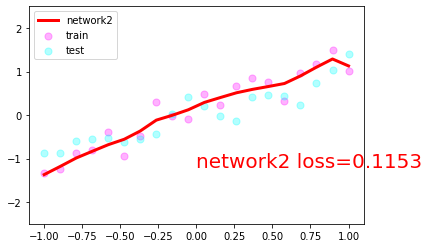

epoch[ 160 ]:  test loss  tensor(0.1186, grad_fn=<MseLossBackward>)


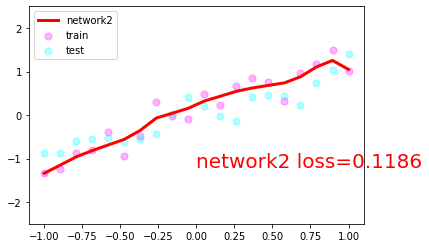

epoch[ 180 ]:  test loss  tensor(0.1421, grad_fn=<MseLossBackward>)


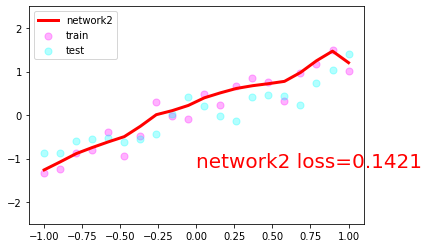

epoch[ 200 ]:  test loss  tensor(0.0993, grad_fn=<MseLossBackward>)


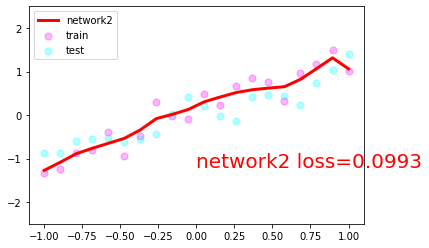

epoch[ 220 ]:  test loss  tensor(0.1122, grad_fn=<MseLossBackward>)


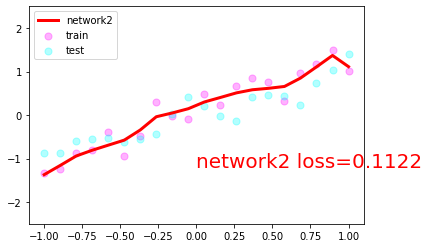

epoch[ 240 ]:  test loss  tensor(0.1823, grad_fn=<MseLossBackward>)


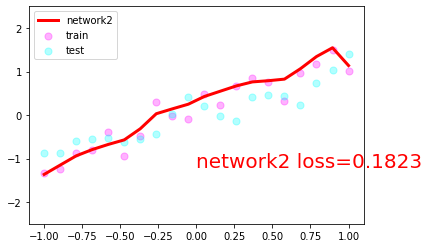

epoch[ 260 ]:  test loss  tensor(0.1158, grad_fn=<MseLossBackward>)


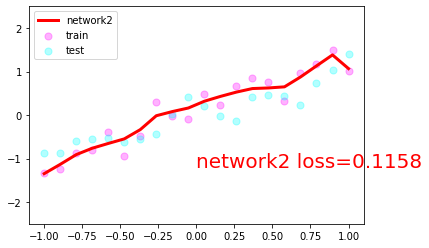

epoch[ 280 ]:  test loss  tensor(0.1387, grad_fn=<MseLossBackward>)


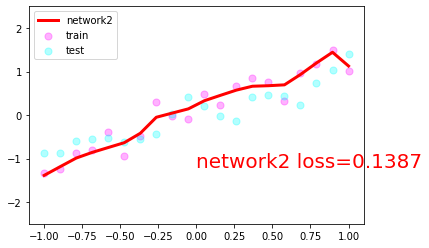

epoch[ 300 ]:  test loss  tensor(0.1304, grad_fn=<MseLossBackward>)


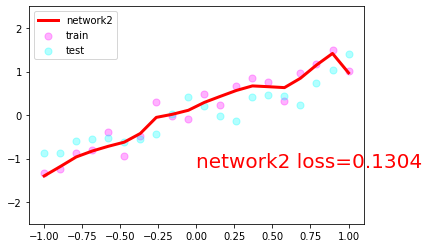

epoch[ 320 ]:  test loss  tensor(0.1576, grad_fn=<MseLossBackward>)


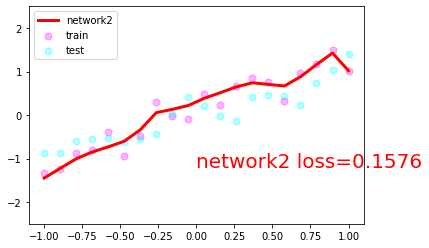

epoch[ 340 ]:  test loss  tensor(0.1148, grad_fn=<MseLossBackward>)


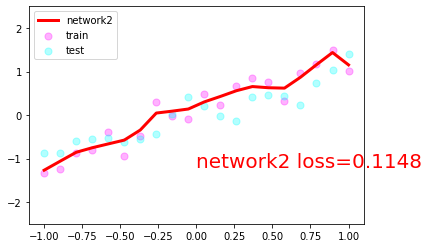

epoch[ 360 ]:  test loss  tensor(0.1279, grad_fn=<MseLossBackward>)


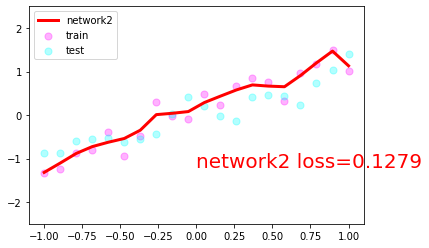

epoch[ 380 ]:  test loss  tensor(0.1136, grad_fn=<MseLossBackward>)


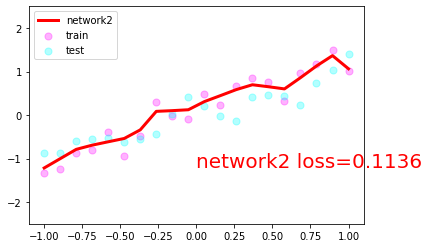

epoch[ 400 ]:  test loss  tensor(0.1308, grad_fn=<MseLossBackward>)


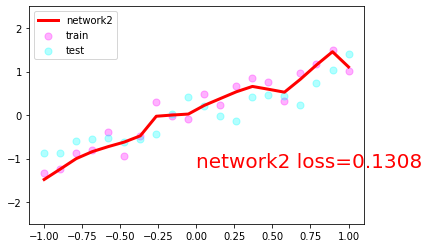

epoch[ 420 ]:  test loss  tensor(0.1695, grad_fn=<MseLossBackward>)


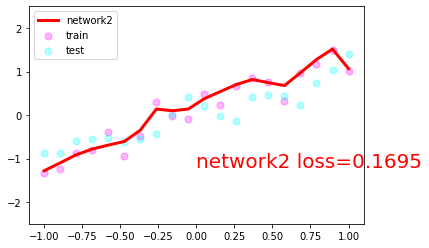

epoch[ 440 ]:  test loss  tensor(0.1236, grad_fn=<MseLossBackward>)


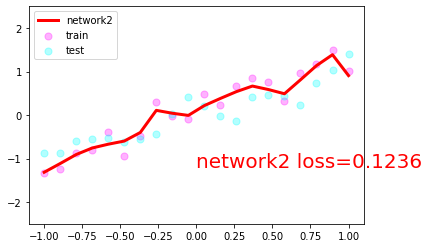

epoch[ 460 ]:  test loss  tensor(0.1334, grad_fn=<MseLossBackward>)


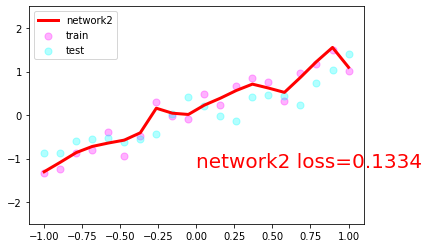

epoch[ 480 ]:  test loss  tensor(0.1309, grad_fn=<MseLossBackward>)


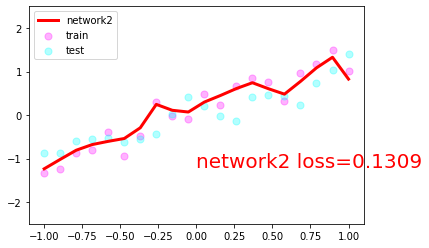

In [17]:
optimizer2 = torch.optim.Adam(network2.parameters(),lr=0.01)  # 优化器: Adam
loss_func = torch.nn.MSELoss()  # 损失函数：均方差损失
test_loss2 = []

plt.ion()

for t in range(500):
    pred2 = network2(x)  # 正向传播
    loss2 = loss_func(pred2, y)  # 计算损失
    
    optimizer2.zero_grad()
    loss2.backward()  # 反向传播
    optimizer2.step()  # 更新参数
    
    network2.eval()
    test_pred2 = network2(test_x)  # 在测试集上测试
    test_loss2.append(loss_func(test_pred2, test_y))  # 记录损失

    if t%20 == 0:  # 绘图
        print("epoch[", t, "]:  test loss ", test_loss2[-1])
        plt.cla()       
        plt.scatter(x.data.numpy(), y.data.numpy(), c='magenta', s=50, alpha=0.3, label='train')
        plt.scatter(test_x.data.numpy(), test_y.data.numpy(), c='cyan', s=50, alpha=0.3, label='test')
        
        plt.plot(test_x.data.numpy(), test_pred2.data.numpy(), 'r-', lw=3, label='network2')
        plt.text(0, -1.2, 'network2 loss=%.4f'%loss_func(test_pred2, test_y).data.numpy(), fontdict={'size':20, 'color':'red'})
        plt.legend(loc='upper left')
        plt.ylim((-2.5, 2.5))
        plt.pause(0.1)
        
    network2.train()  

plt.ioff()
plt.show()

<br>

<font color=black size=3 face=雅黑>把 test_loss2 打印出来看看：

<br>

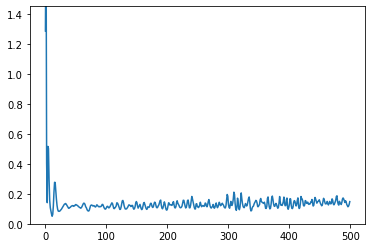

In [18]:
plot_loss_x = np.arange(0,500)
plt.ylim((0, 1.45))
plt.plot(plot_loss_x, np.array(test_loss2))

<br>

<font color=black size=3 face=雅黑>变换 y 轴的范围放大来看：
    
<br>

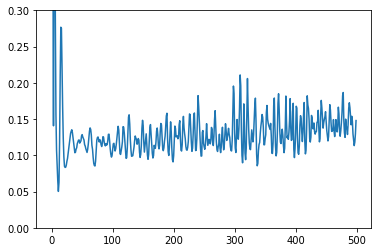

In [19]:
plt.ylim((0, 0.3))
plt.plot(plot_loss_x, np.array(test_loss2))

<br>

## 3. 解决过拟合 - 方案二 ： 增加训练数据集的大小

<br>

<font color=black size=3 face=雅黑>　　⼀般来说，如果训练数据集中样本数过少（特别相对模型大小来讲），过拟合更容易发⽣。因此，在计算资源允许的范围之内，我们通常希望训练数据集⼤⼀些。
    
<br>    
    
<font color=black size=3 face=雅黑>　　 下面我们就来看看训练集大小对泛化误差的影响。在最初的模型中，我们随机产生了20个样本点作为训练集。显然，这个数量是不够的。下面我们将训练集和测试集的样本个数分别增加到200个，重新定义一个和 Network1 相同的网络 Network3，并训练与测试。

<br>

### 3.1 重建数据集

<br>

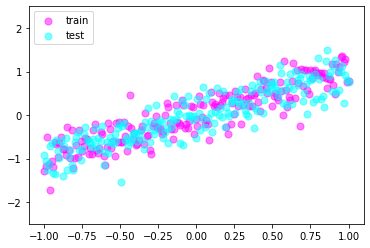

In [20]:
N_SAMPLES3 = 200  # 样本点个数

# 生成训练集
x3 = torch.unsqueeze(torch.linspace(-1, 1, N_SAMPLES3),1)
y3 = x3 + 0.3*torch.normal(torch.zeros(N_SAMPLES3,1), torch.ones(N_SAMPLES3,1))

# 生成测试集
test_x3 = torch.unsqueeze(torch.linspace(-1, 1, N_SAMPLES3),1)
test_y3 = test_x3 + 0.3*torch.normal(torch.zeros(N_SAMPLES3,1), torch.ones(N_SAMPLES3,1))

# 绘图
plt.scatter(x3.data.numpy(), y3.data.numpy(), c='magenta', s=50, alpha=0.5, label='train')
plt.scatter(test_x3.data.numpy(), test_y3.data.numpy(), c='cyan', s=50, alpha=0.5, label='test')
plt.legend(loc='upper left')
plt.ylim((-2.5, 2.5))
plt.show()

### 3.2 构建神经网络

<br>

<font color=black size=3 face=雅黑>　　 此处我们将构建一个与 Network1 相同的神经网络 Network3。

<br>

In [21]:
N_HIDDEN3 = 300

class Network3(nn.Module):
    def __init__(self):
        super(Network3, self).__init__()
        self.layer1 = nn.Linear(1, 300)
        self.layer2 = nn.Linear(300, 300)
        self.layer3 = nn.Linear(300, 1)
       
    def forward(self, t):
        t = self.layer1(t)
        t = nn.functional.relu(t)
        t = self.layer2(t)
        t = nn.functional.relu(t)
        t = self.layer3(t)
        
        return t

In [22]:
network3 = Network3()
print(network3)

Network3(
  (layer1): Linear(in_features=1, out_features=300, bias=True)
  (layer2): Linear(in_features=300, out_features=300, bias=True)
  (layer3): Linear(in_features=300, out_features=1, bias=True)
)


### 3.3 训练并测试网络

<br>

epoch[ 0 ]:  test loss  tensor(1.7654, grad_fn=<MseLossBackward>)


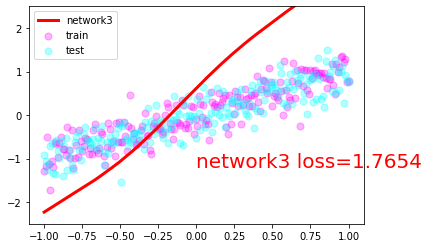

epoch[ 20 ]:  test loss  tensor(0.1173, grad_fn=<MseLossBackward>)


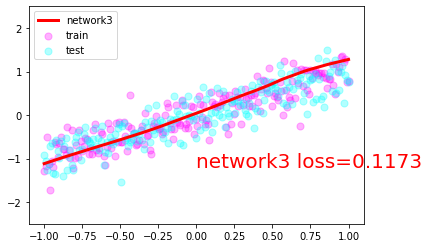

epoch[ 40 ]:  test loss  tensor(0.0878, grad_fn=<MseLossBackward>)


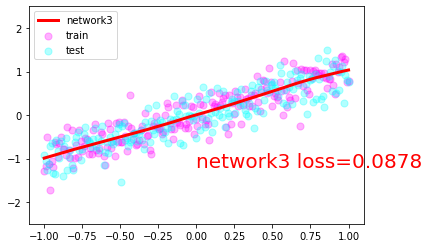

epoch[ 60 ]:  test loss  tensor(0.0882, grad_fn=<MseLossBackward>)


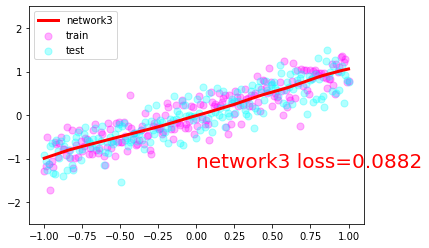

epoch[ 80 ]:  test loss  tensor(0.0884, grad_fn=<MseLossBackward>)


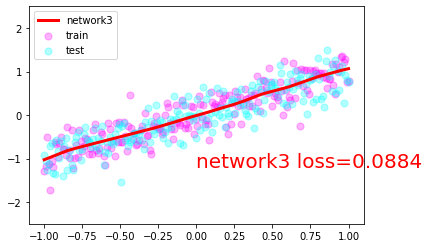

epoch[ 100 ]:  test loss  tensor(0.0884, grad_fn=<MseLossBackward>)


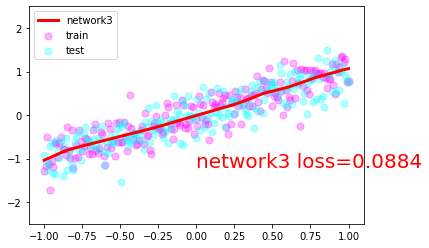

epoch[ 120 ]:  test loss  tensor(0.0879, grad_fn=<MseLossBackward>)


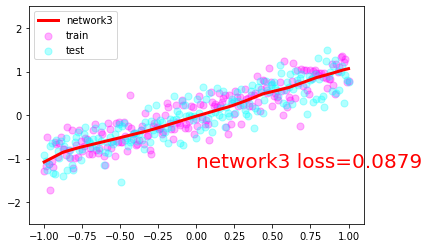

epoch[ 140 ]:  test loss  tensor(0.0886, grad_fn=<MseLossBackward>)


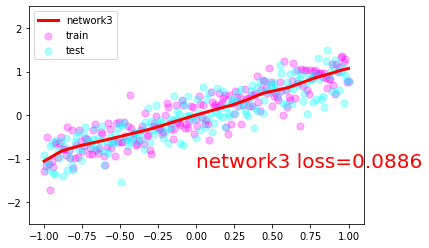

epoch[ 160 ]:  test loss  tensor(0.0885, grad_fn=<MseLossBackward>)


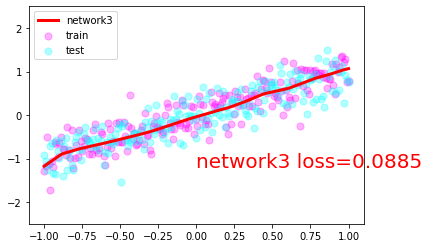

epoch[ 180 ]:  test loss  tensor(0.0894, grad_fn=<MseLossBackward>)


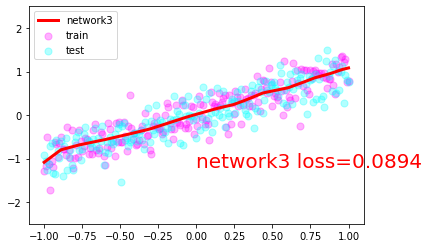

epoch[ 200 ]:  test loss  tensor(0.0924, grad_fn=<MseLossBackward>)


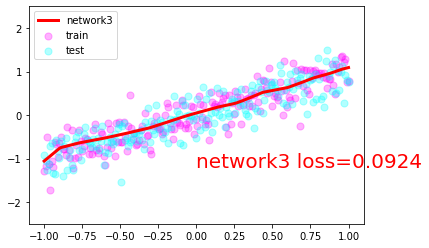

epoch[ 220 ]:  test loss  tensor(0.0901, grad_fn=<MseLossBackward>)


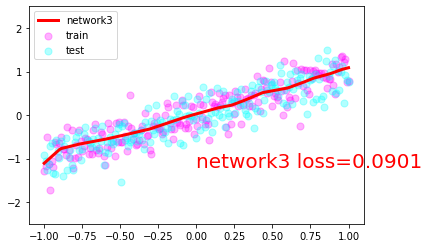

epoch[ 240 ]:  test loss  tensor(0.0885, grad_fn=<MseLossBackward>)


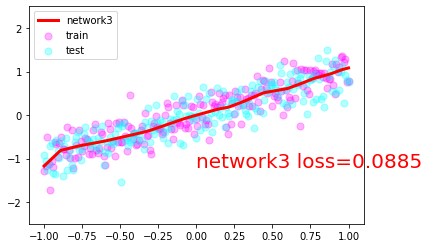

epoch[ 260 ]:  test loss  tensor(0.0893, grad_fn=<MseLossBackward>)


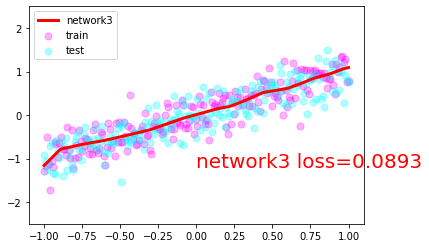

epoch[ 280 ]:  test loss  tensor(0.0904, grad_fn=<MseLossBackward>)


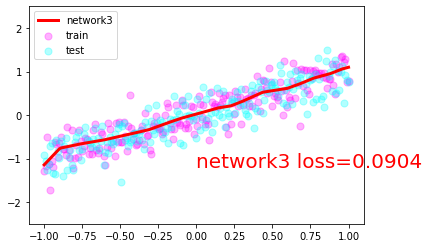

epoch[ 300 ]:  test loss  tensor(0.0889, grad_fn=<MseLossBackward>)


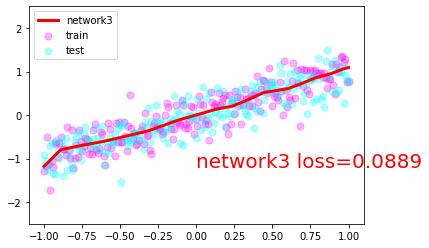

epoch[ 320 ]:  test loss  tensor(0.0897, grad_fn=<MseLossBackward>)


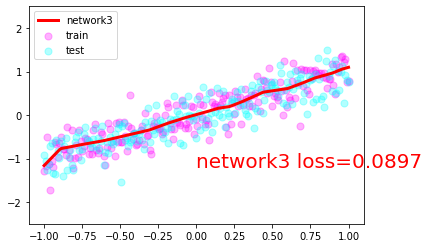

epoch[ 340 ]:  test loss  tensor(0.0891, grad_fn=<MseLossBackward>)


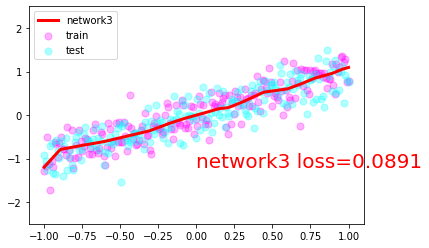

epoch[ 360 ]:  test loss  tensor(0.0892, grad_fn=<MseLossBackward>)


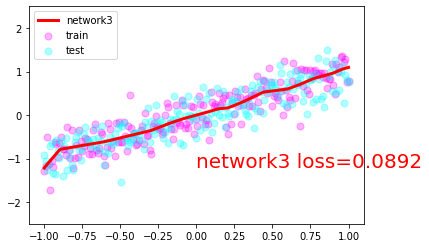

epoch[ 380 ]:  test loss  tensor(0.0940, grad_fn=<MseLossBackward>)


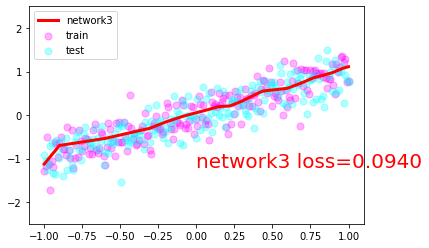

epoch[ 400 ]:  test loss  tensor(0.0923, grad_fn=<MseLossBackward>)


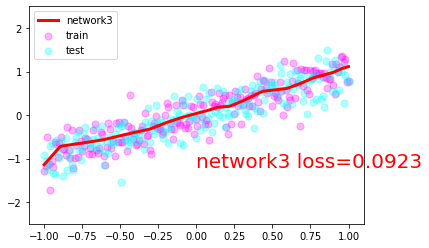

epoch[ 420 ]:  test loss  tensor(0.0901, grad_fn=<MseLossBackward>)


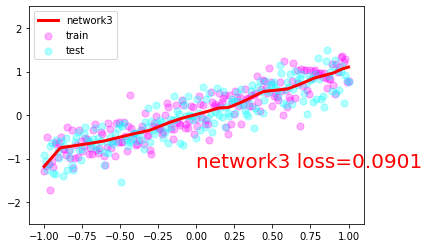

epoch[ 440 ]:  test loss  tensor(0.0896, grad_fn=<MseLossBackward>)


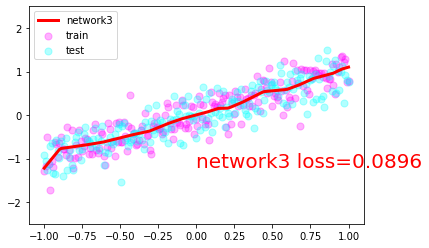

epoch[ 460 ]:  test loss  tensor(0.0894, grad_fn=<MseLossBackward>)


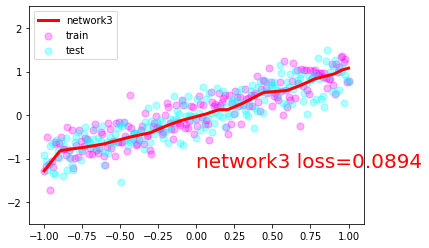

epoch[ 480 ]:  test loss  tensor(0.0913, grad_fn=<MseLossBackward>)


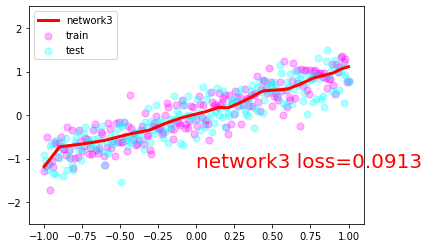

In [23]:
optimizer3 = torch.optim.Adam(network3.parameters(),lr=0.01)  # 优化器：Adam
loss_func = torch.nn.MSELoss()  # 损失函数：均方差损失
test_loss3 = []

plt.ion()

for t in range(500):
    pred3 = network3(x3)  # 正向传播
    loss3 = loss_func(pred3, y3)  # 计算损失
    
    optimizer3.zero_grad()
    loss3.backward()  # 反向传播
    optimizer3.step()  # 更新参数
    
    network3.eval()
    test_pred3 = network3(test_x3)  # 在测试集上测试
    test_loss3.append(loss_func(test_pred3, test_y3))    

    if t%20 == 0:      
        print("epoch[", t, "]:  test loss ", test_loss3[-1])
        plt.cla()       
        plt.scatter(x3.data.numpy(), y3.data.numpy(), c='magenta', s=50, alpha=0.3, label='train')
        plt.scatter(test_x3.data.numpy(), test_y3.data.numpy(), c='cyan', s=50, alpha=0.3, label='test')
        
        plt.plot(test_x3.data.numpy(), test_pred3.data.numpy(), 'r-', lw=3, label='network3')
        plt.text(0, -1.2, 'network3 loss=%.4f'%loss_func(test_pred3, test_y3).data.numpy(), fontdict={'size':20, 'color':'red'})
        plt.legend(loc='upper left')
        plt.ylim((-2.5, 2.5))
        plt.pause(0.1)
        
    network3.train()  

plt.ioff()
plt.show()

<br>

<font color=black size=3 face=雅黑>把 test_loss3 打印出来看看：

<br>

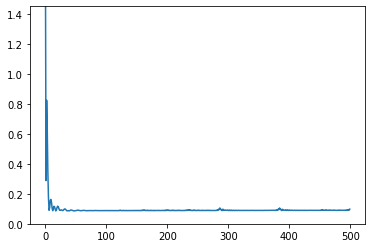

In [24]:
plot_loss_x = np.arange(0,500)
plt.ylim((0, 1.45))
plt.plot(plot_loss_x, np.array(test_loss3))

<br>

<font color=black size=3 face=雅黑>变换 y 轴的范围放大来看:
    
<br>

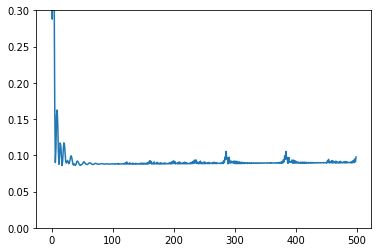

In [25]:
plt.ylim((0, 0.3))
plt.plot(plot_loss_x, np.array(test_loss3))

<br>

## 4. 解决过拟合 - 方案三 ： 

<br>

<font color=black size=3 face=雅黑>　　**作为解决过拟合的第3个方案，请同学们阅读以下代码，并在实验报告中做出解释。例如：方案3采取了什么策略来解决过拟合问题？训练及测试结果和 network1 相比如何？变动其关键参数（weight_decay），观察对泛化性能有什么影响。**

<br>

### 4.1 构建神经网络

<br>

<font color=black size=3 face=雅黑>　　 此处我们将构建一个与 Network1 相同的神经网络 Network4。

<br>

In [26]:
N_HIDDEN4 = 300

class Network4(nn.Module):
    def __init__(self):
        super(Network4, self).__init__()
        self.layer1 = nn.Linear(1, 300)
        self.layer2 = nn.Linear(300, 300)
        self.layer3 = nn.Linear(300, 1)
       
    def forward(self, t):
        t = self.layer1(t)
        t = nn.functional.relu(t)
        t = self.layer2(t)
        t = nn.functional.relu(t)
        t = self.layer3(t)
        
        return t

In [27]:
network4 = Network4()
print(network4)

Network4(
  (layer1): Linear(in_features=1, out_features=300, bias=True)
  (layer2): Linear(in_features=300, out_features=300, bias=True)
  (layer3): Linear(in_features=300, out_features=1, bias=True)
)


### 4.2 训练并测试

<br>

<font color=black size=3 face=雅黑>　　 请注意 optimizer4：与前三项训练中的 optimizer 不同，此处我们多设置了一个参数 weight_decay。

<br>

epoch[ 0 ]:  test loss  tensor(2.3888, grad_fn=<MseLossBackward>)


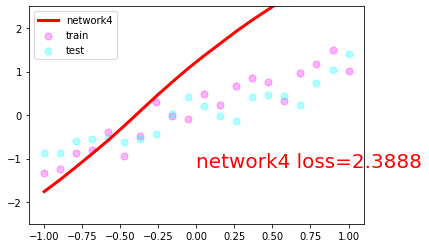

epoch[ 20 ]:  test loss  tensor(0.0933, grad_fn=<MseLossBackward>)


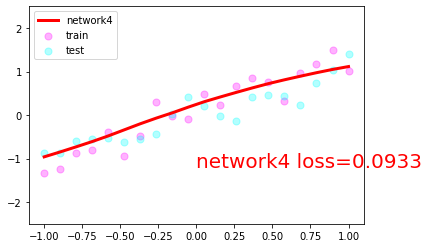

epoch[ 40 ]:  test loss  tensor(0.1114, grad_fn=<MseLossBackward>)


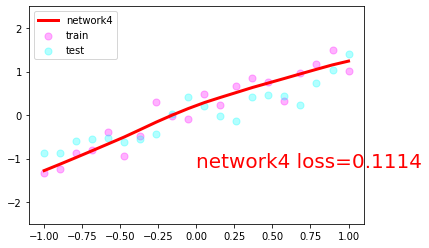

epoch[ 60 ]:  test loss  tensor(0.1008, grad_fn=<MseLossBackward>)


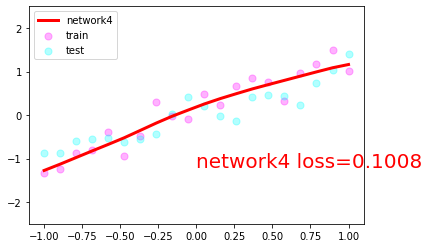

epoch[ 80 ]:  test loss  tensor(0.1152, grad_fn=<MseLossBackward>)


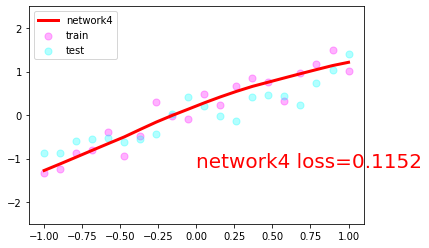

epoch[ 100 ]:  test loss  tensor(0.1129, grad_fn=<MseLossBackward>)


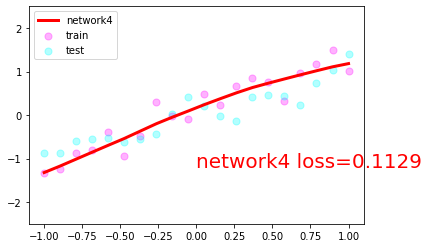

epoch[ 120 ]:  test loss  tensor(0.1169, grad_fn=<MseLossBackward>)


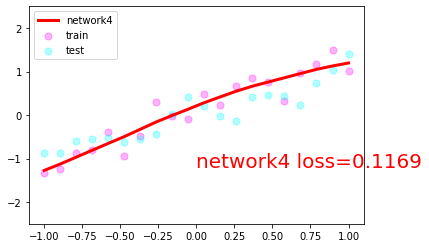

epoch[ 140 ]:  test loss  tensor(0.0943, grad_fn=<MseLossBackward>)


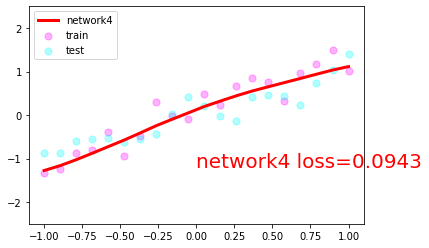

epoch[ 160 ]:  test loss  tensor(0.1153, grad_fn=<MseLossBackward>)


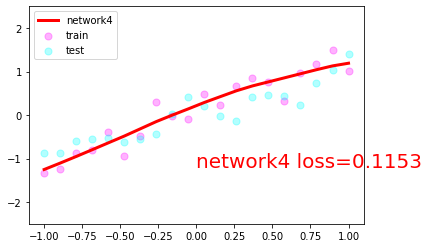

epoch[ 180 ]:  test loss  tensor(0.1152, grad_fn=<MseLossBackward>)


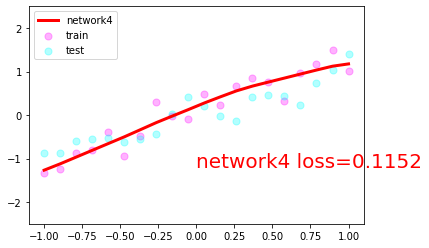

epoch[ 200 ]:  test loss  tensor(0.1150, grad_fn=<MseLossBackward>)


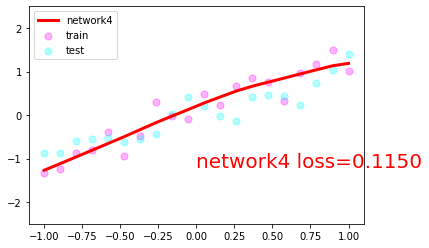

epoch[ 220 ]:  test loss  tensor(0.1150, grad_fn=<MseLossBackward>)


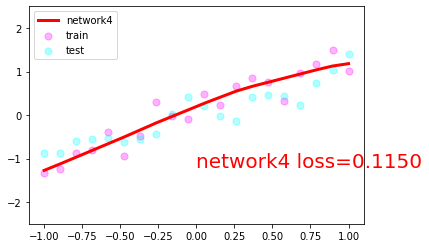

epoch[ 240 ]:  test loss  tensor(0.1176, grad_fn=<MseLossBackward>)


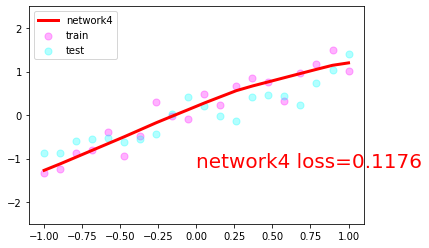

epoch[ 260 ]:  test loss  tensor(0.1167, grad_fn=<MseLossBackward>)


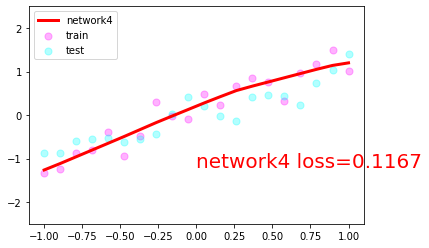

epoch[ 280 ]:  test loss  tensor(0.1124, grad_fn=<MseLossBackward>)


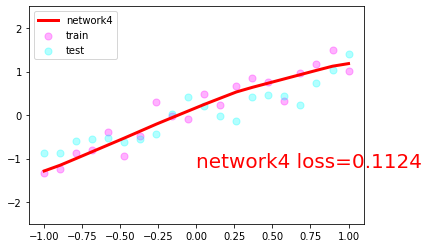

epoch[ 300 ]:  test loss  tensor(0.1179, grad_fn=<MseLossBackward>)


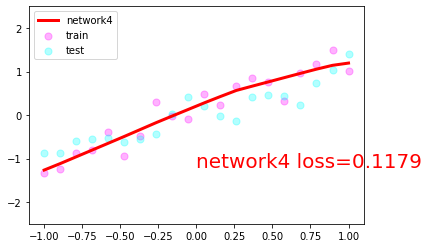

epoch[ 320 ]:  test loss  tensor(0.1151, grad_fn=<MseLossBackward>)


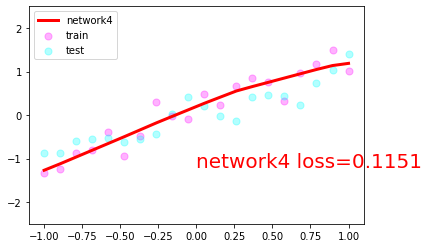

epoch[ 340 ]:  test loss  tensor(0.1134, grad_fn=<MseLossBackward>)


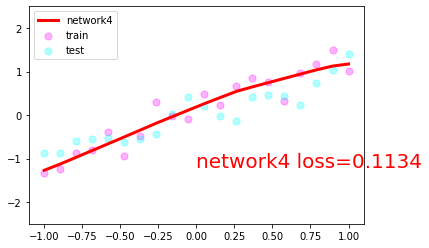

epoch[ 360 ]:  test loss  tensor(0.1168, grad_fn=<MseLossBackward>)


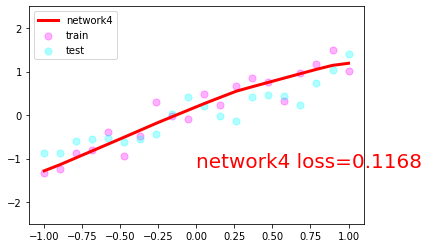

epoch[ 380 ]:  test loss  tensor(0.1161, grad_fn=<MseLossBackward>)


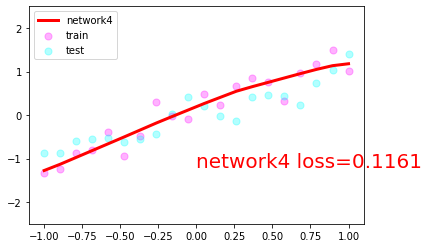

epoch[ 400 ]:  test loss  tensor(0.1176, grad_fn=<MseLossBackward>)


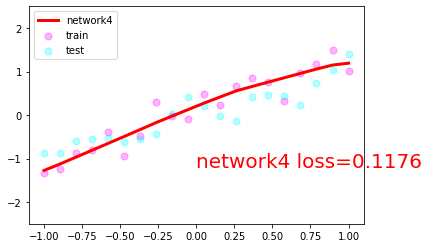

epoch[ 420 ]:  test loss  tensor(0.1150, grad_fn=<MseLossBackward>)


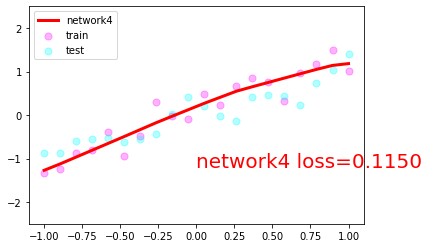

epoch[ 440 ]:  test loss  tensor(0.1161, grad_fn=<MseLossBackward>)


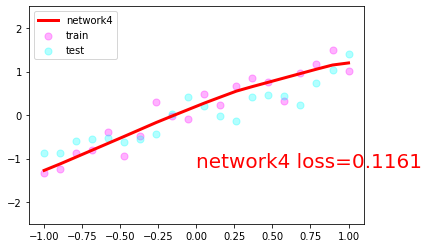

epoch[ 460 ]:  test loss  tensor(0.1142, grad_fn=<MseLossBackward>)


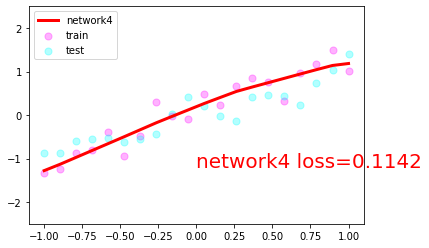

epoch[ 480 ]:  test loss  tensor(0.1143, grad_fn=<MseLossBackward>)


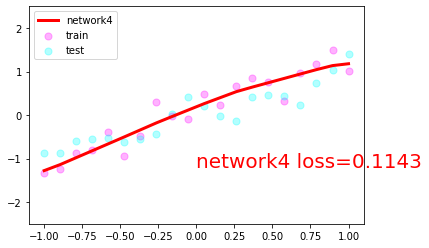

In [28]:
optimizer4 = torch.optim.Adam(network4.parameters(), lr=0.01, weight_decay=0.01)  # 优化器：Adam （注意 weight_decay）
loss_func = torch.nn.MSELoss()  # 损失函数：均方差损失
test_loss4 = []

plt.ion()

for t in range(500):
    pred4 = network4(x)  # 正向传播
    loss4 = loss_func(pred4, y)  # 计算损失
    
    optimizer4.zero_grad()
    loss4.backward()  # 反向传播
    optimizer4.step()  # 更新参数
    
    network4.eval()
    test_pred4 = network4(test_x)  # 在测试集上测试
    test_loss4.append(loss_func(test_pred4, test_y))    

    if t%20 == 0:      
        print("epoch[", t, "]:  test loss ", test_loss4[-1])
        plt.cla()       
        plt.scatter(x.data.numpy(), y.data.numpy(), c='magenta', s=50, alpha=0.3, label='train')
        plt.scatter(test_x.data.numpy(), test_y.data.numpy(), c='cyan', s=50, alpha=0.3, label='test')
        
        plt.plot(test_x.data.numpy(), test_pred4.data.numpy(), 'r-', lw=3, label='network4')
        plt.text(0, -1.2, 'network4 loss=%.4f'%loss_func(test_pred4, test_y).data.numpy(), fontdict={'size':20, 'color':'red'})
        plt.legend(loc='upper left')
        plt.ylim((-2.5, 2.5))
        plt.pause(0.1)
        
    network4.train()  

plt.ioff()
plt.show()

<br>

<font color=black size=3 face=雅黑>把 test_loss4 打印出来看看：

<br>

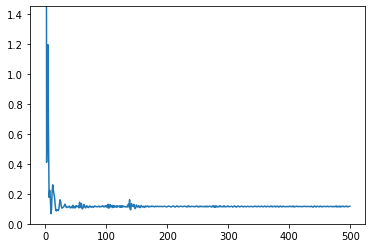

In [29]:
plot_loss_x = np.arange(0,500)
plt.ylim((0, 1.45))
plt.plot(plot_loss_x, np.array(test_loss4))

<br>

<font color=black size=3 face=雅黑>变换 y 轴的范围放大来看：
    
<br>

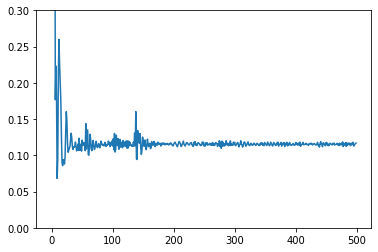

In [30]:
plt.ylim((0, 0.3))
plt.plot(plot_loss_x, np.array(test_loss4))

<br>

<font color=black size=3 face=雅黑>Reference: https://blog.csdn.net/nanke_4869/article/details/113571573